# Teacher dashboard

In [1]:
import numpy as np
import pandas as pd
from pandas import read_excel

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# data source
# survey result  
df = read_excel('Student Survey - July.xlsx', sheet_name='responses')
# students attributes
df2 = read_excel('Student Survey - July.xlsx', sheet_name='participantsNov')
# inner merge on participant ID
temp = pd.merge(df, df2, on=['Participant-ID'])


# data cleaning
# hard-code a house
hard_coded_house = 'Vanguard'
# select only 'completed'
df3 = temp[(temp['Status'].isin(['completed'])) & (temp['House'] == hard_coded_house)]

# Landing page

## 1. survey completion rate

In [3]:
print('Percentage of non-completion = ', round((len(temp[temp['House'] == hard_coded_house]) - len(temp[(temp['Status'] == 'completed') & (temp['House'] == hard_coded_house)]))/len(temp) * 100, 2), '%')

Percentage of non-completion =  3.45 %


### 1.1 students list for teacher to follow up

In [4]:
temp[['Participant-ID', 'First-Name', 'Last-Name', 'Email', 'Contact Number', 'Status']][(temp['Status'].isin(['in progress', 'invited'])) & (temp['House'] == hard_coded_house)]

,Participant-ID,First-Name,Last-Name,Email,Contact Number,Status
23,37859,Isaac,Walker,Isaac.Walker@school.edu,NaN,in progress
28,37922,Cole,Brooks,Cole.Brooks@school.edu,NaN,in progress
38,37867,Winston,Bruce,Winston.Bruce@school.edu,NaN,in progress
99,37898,Joseph,Thompson,Joseph.Thompson@school.edu,NaN,in progress
101,37944,Jaxson,Washington,Jaxson.Washington@school.edu,NaN,in progress
116,37976,Cole,Stewart,Cole.Stewart@school.edu,NaN,in progress


# 'Alert' dashboard

## 1.K6 score

### 1.1a student with abnormal score

In [5]:
df3[['Participant-ID', 'First-Name', 'Last-Name', 'k6_overall']][(df3['k6_overall'] >= 20)]

,Participant-ID,First-Name,Last-Name,k6_overall
102,37884,Emmanuel,Chambers,20.0


### 1.1b student with borderline score

In [6]:
df3[['Participant-ID', 'First-Name', 'Last-Name', 'k6_overall']][(df3['k6_overall'] >= 16) & (df3['k6_overall'] < 20)]

,Participant-ID,First-Name,Last-Name,k6_overall
63,37965,Tristan,James,16.0
96,37983,Jude,Graham,19.0
139,37886,Xavier,Bryant,17.0


In [7]:
df3['Participant-ID'][(df3['k6_overall'] >= 16) & (df3['k6_overall'] < 20)]

63     37965
96     37983
139    37886
Name: Participant-ID, dtype: int64

#### 1.1.1 For each student in the list of 2.1 and 2.2, show their network relationships

In [8]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect']
studentID = df3['Participant-ID']

network_html = SNA_network_list[2] # user select one network to show
student_html = studentID.iloc[1] # user select a student

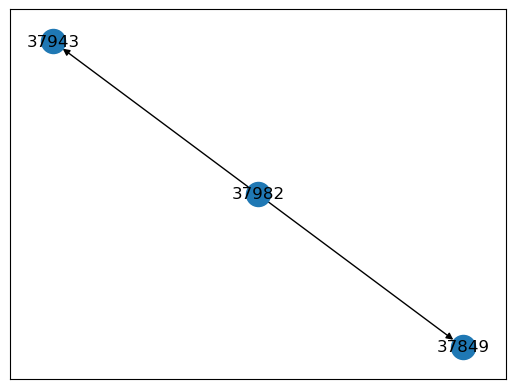

In [9]:
network = read_excel('Student Survey - July.xlsx', sheet_name=network_html)
network.drop(network[network['Source'] != student_html].index, inplace=True)
np.savetxt(r'network_result.txt', network.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 2. Disrespectful

In [10]:
temp_list_1 = read_excel('Student Survey - July.xlsx', sheet_name= 'net_5_Disrespect')
temp_list_1 = temp_list_1.rename(columns={'Source': 'Participant-ID', 'Target': 'Target'})
temp_list_2 = read_excel('Student Survey - July.xlsx', sheet_name='participantsNov')
disrespect_list_1 = pd.merge(temp_list_1, temp_list_2, on=['Participant-ID'])
disrespect_list_2 = disrespect_list_1[['Participant-ID', 'First-Name', 'Last-Name', 'Target']][disrespect_list_1['House'] == hard_coded_house]

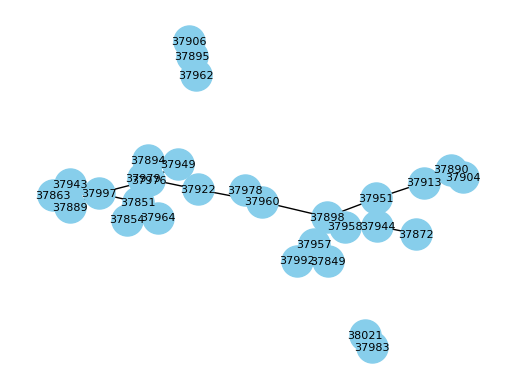

In [11]:
# Create a graph from the data
G = nx.from_pandas_edgelist(disrespect_list_2, source='Participant-ID', target='Target')

# Visualize the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}

# Create a figure and axis objects
fig, ax = plt.subplots()

# Draw the graph on the axis
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=8, ax=ax)

# Show the plot
plt.show()

### 2.1 List of student being disrespected by

In [12]:
victim = disrespect_list_2[['Participant-ID', 'First-Name', 'Last-Name']]
victim['Participant-ID'].unique()

array([37851, 37922, 37849, 37992, 37958, 37904, 37894, 37951, 37983,
       37978, 37898, 37895, 37976, 37872, 37997, 37890], dtype=int64)

### 2.2 List of student being disrespecful

In [13]:
bully = disrespect_list_2['Target']
bully.unique()

array([37854, 37964, 37979, 37960, 37957, 37898, 37913, 37976, 38021,
       37951, 37944, 37962, 37906, 37949, 37851, 37889, 37863, 37943,
       37904], dtype=int64)

### 2.3 indvidual student SNA dashboard

In [14]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect'] 
studentID = df3['Participant-ID']

In [15]:
student_html = studentID.iloc[3] # user select a student
network_html = SNA_network_list[4] # user select one network to show

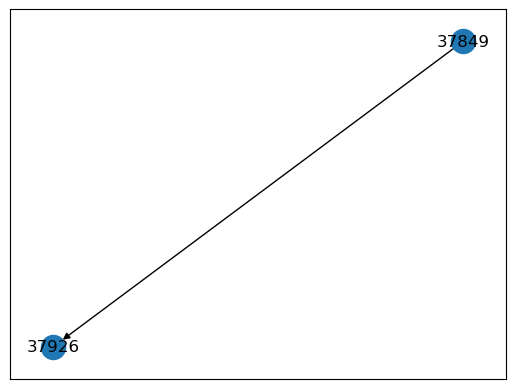

In [16]:
network = read_excel('Student Survey - July.xlsx', sheet_name=network_html)
network.drop(network[network['Source'] != student_html].index, inplace=True)
np.savetxt(r'network_result.txt', network.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

# Student SNA and survey result 

## 1. indvidual student SNA dashboard

In [17]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect'] 
studentID = df3['Participant-ID']

In [18]:
studentID

13     38007
14     37982
17     37851
29     37849
32     37992
35     37888
43     37878
54     37958
59     37904
62     37894
63     37965
74     37951
85     37927
88     37854
96     37983
98     37978
102    37884
115    37895
124    37872
139    37886
143    37997
166    37856
172    37890
Name: Participant-ID, dtype: int64

In [19]:
student_html = studentID.iloc[3] # user select a student
network_html = SNA_network_list[4] # user select one network to show

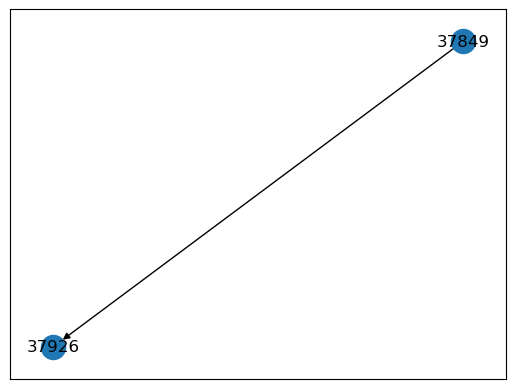

In [20]:
network = read_excel('Student Survey - July.xlsx', sheet_name=network_html)
network.drop(network[network['Source'] != student_html].index, inplace=True)
np.savetxt(r'network_result.txt', network.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 3 Man box (the top 5%)

In [21]:
# set the threshold
threshold = df['Manbox5_overall'].quantile(0.95)

In [22]:
df3[['Participant-ID', 'First-Name', 'Last-Name', 'Manbox5_overall']][df3['Manbox5_overall'] >= threshold]

,Participant-ID,First-Name,Last-Name,Manbox5_overall
17,37851,Spencer,Woodward,4.2


#### 3.1 For each student in the list, show their network relationships

In [23]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect']

network_html = SNA_network_list[0] # user select one network to show
student_html = studentID.iloc[20] # user select a student

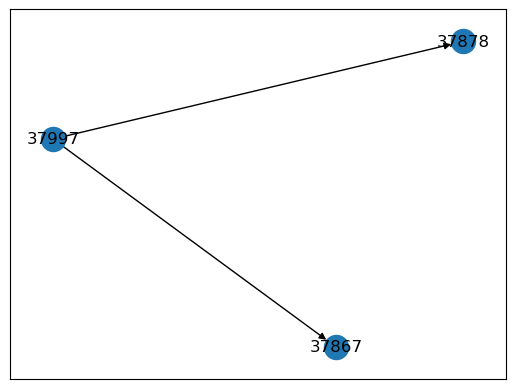

In [24]:
network = read_excel('Student Survey - July.xlsx', sheet_name=network_html)
network.drop(network[network['Source'] != student_html].index, inplace=True)
np.savetxt(r'network_result.txt', network.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 4 Masculinity measure (the top 5%)

In [25]:
# set the threshold
threshold = df['Masculinity_contrained'].quantile(0.95)

In [26]:
df3[['Participant-ID', 'First-Name', 'Last-Name', 'Masculinity_contrained']][df3['Masculinity_contrained'] >= threshold]

,Participant-ID,First-Name,Last-Name,Masculinity_contrained
17,37851,Spencer,Woodward,5.5


#### 4.1 For each student in the list, show their network relationships

In [27]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect']

network_html = SNA_network_list[3] # user select one network to show
student_html = studentID.iloc[18] # user select a student

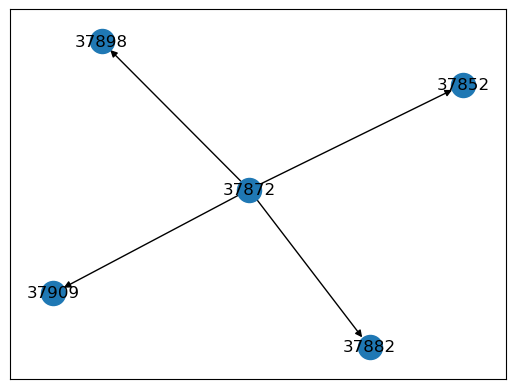

In [28]:
network = read_excel('Student Survey - July.xlsx', sheet_name=network_html)
network.drop(network[network['Source'] != student_html].index, inplace=True)
np.savetxt(r'network_result.txt', network.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 5 School engagment measure (the top 5%)

#### 5.1a The most engage

In [29]:
# set the threshold
threshold = df['School_support_engage6'].quantile(0.95)

In [30]:
df3[['Participant-ID', 'First-Name', 'Last-Name', 'School_support_engage6']][df3['School_support_engage6'] >= threshold]

,Participant-ID,First-Name,Last-Name,School_support_engage6
14,37982,Hayden,West,6.5
29,37849,Graham,Glenn,6.5
85,37927,Benjamin,Miller,6.5
88,37854,Christian,Campbell,6.5


#### 5.2 For each student in the list, show their network relationships

In [33]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect'] 
network_html = SNA_network_list[3] # user select one network to show
student_html = studentID.iloc[12] # user select a student

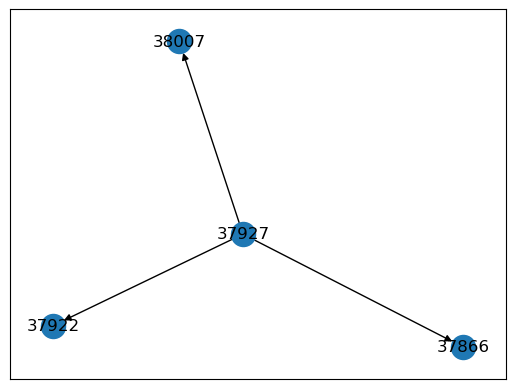

In [34]:
network = read_excel('Student Survey - July.xlsx', sheet_name=network_html)
network.drop(network[network['Source'] != student_html].index, inplace=True)
np.savetxt(r'network_result.txt', network.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 6 Learning difficulties (the top 5%)

In [35]:
# set the threshold
threshold = df['GrowthMindset'].quantile(0.95)

In [36]:
df3[['Participant-ID', 'First-Name', 'Last-Name', 'GrowthMindset']][df3['GrowthMindset'] >= threshold]

,Participant-ID,First-Name,Last-Name,GrowthMindset
43,37878,Levi,Mitchell,10.5
85,37927,Benjamin,Miller,10.5
166,37856,Titus,Serrano,10.5


#### 6.2 For each student in the list, show their network relationships

In [37]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect']

network_html = SNA_network_list[3] # user select one network to show
student_html = studentID.iloc[1] # user select a student

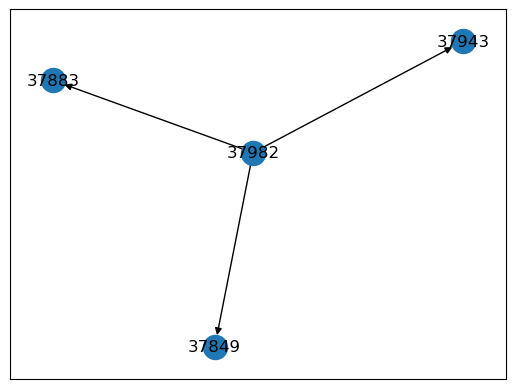

In [38]:
network = read_excel('Student Survey - July.xlsx', sheet_name=network_html)
network.drop(network[network['Source'] != student_html].index, inplace=True)
np.savetxt(r'network_result.txt', network.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

# SNA adjanency matrix

In [39]:
SNA_network_list = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect']    
sna_html = SNA_network_list[5] # user select a score to view

In [40]:
df = read_excel('Student Survey - July.xlsx', sheet_name=sna_html)
df = df.rename(columns={'Source': 'Participant-ID', 'Target': 'Target'})
df2 = read_excel('Student Survey - July.xlsx', sheet_name='participantsNov')
df3 = pd.merge(df, df2, on=['Participant-ID'])
df3 = df3[['Participant-ID', 'Target', 'House']][df3['House'] == hard_coded_house]

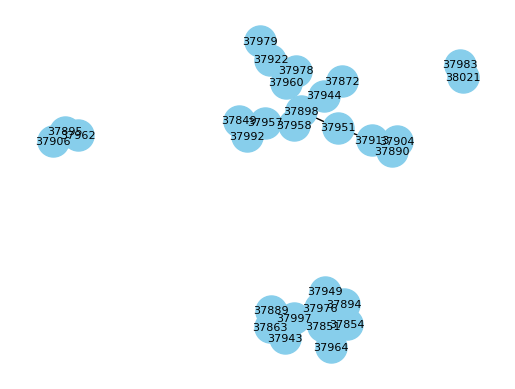

In [41]:
# Create a graph from the data
G = nx.from_pandas_edgelist(df3, source='Participant-ID', target='Target')

# Visualize the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}

# Create a figure and axis objects
fig, ax = plt.subplots()

# Draw the graph on the axis
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=8, ax=ax)

# Show the plot
plt.show()